In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df= pd.read_csv('PBL5recommendationdata.csv', encoding='latin-1')
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [4]:
df.shape

(4194, 181)

In [5]:
df.columns.tolist()

['Customers.id',
 'Customers.fname',
 'Customers.lname',
 'Customers.company',
 'Customers.create_date',
 'Customers.status',
 'Customers.mailing',
 'Customers.reminders',
 'Customers.tax_exempt',
 'Customers.account_id',
 'Customers.sales_rep',
 'Customers.rewards',
 'Customers.profile_id',
 'Customers.last_modified',
 'Customers.customer_type',
 'Orders.id',
 'Orders.customer_id',
 'Orders.fname',
 'Orders.lname',
 'Orders.company',
 'Orders.order_number',
 'Orders.reorder_id',
 'Orders.external_source',
 'Orders.external_id',
 'Orders.currency',
 'Orders.sales_rep',
 'Orders.subtotal',
 'Orders.tax',
 'Orders.shipping',
 'Orders.coupon_id',
 'Orders.coupon_amount',
 'Orders.gift_id',
 'Orders.gift_amount',
 'Orders.fee_name',
 'Orders.fee_amount',
 'Orders.discount_name',
 'Orders.discount_amount',
 'Orders.total',
 'Orders.balance_due',
 'Orders.shipping_carrier',
 'Orders.shipping_method',
 'Orders.shipping_trans',
 'Orders.shipping_flags',
 'Orders.weight',
 'Orders.tracking',
 '

In [6]:
df = df[df['Orders.subtotal'] > 0] # harcama > 0 olanlar

In [7]:
df['Order_Items.qty'].sort_values()

0         1
2651      1
2652      1
2654      1
2655      1
       ... 
1597     30
2305     40
3469    122
522     200
3631    500
Name: Order_Items.qty, Length: 4194, dtype: int64

In [8]:
df = df[df['Order_Items.qty'] > 0] # alınan ürün

In [9]:
import datetime as dt
#df['Customers.last_modified'] = df['Customers.last_modified'].apply(lambda d: dt.datetime)

In [10]:
dfa = df.groupby('Customers.id').agg({'Orders.subtotal': lambda x: x.sum(),
                                     'Customers.last_modified': lambda x: x.max()})

In [11]:
dfb = df.groupby(['Customers.id','Order_Items.product_id']).agg({'Orders.subtotal': lambda x: x.sum()})

In [12]:
dfc= df.groupby('Customers.id').agg({'Orders.subtotal': lambda x: len(x)})

In [13]:
rfm_table = pd.merge(dfa, dfc ,on='Customers.id')

In [14]:
rfm_table.head()

,Orders.subtotal_x,Customers.last_modified,Orders.subtotal_y
Customers.id,,,
3,88.78,1437764354,2.0
4,19.56,1437762646,1.0
5,95.14,1437764316,3.0
7,39.19,1437763617,1.0
8,59.75,1437763421,1.0


In [16]:
rfm_table.replace({'Customers.last_modified': 'Recency',
                           'Orders.subtotal_y': 'Frequency',
                           'Orders.subtotal_x': 'Money'})

,Orders.subtotal_x,Customers.last_modified,Orders.subtotal_y
Customers.id,,,
3,88.78,1437764354,2.0
4,19.56,1437762646,1.0
5,95.14,1437764316,3.0
7,39.19,1437763617,1.0
8,59.75,1437763421,1.0
...,...,...,...
3730,14.85,1463408698,1.0
3732,39.99,1463412756,1.0
3733,1099.00,1463413245,1.0


In [17]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 3 to 3736
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Orders.subtotal_x        3054 non-null   float64
 1   Customers.last_modified  3054 non-null   int64  
 2   Orders.subtotal_y        3054 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 95.4 KB


In [18]:
rfm_table['Orders.subtotal_x'].astype(object)

Customers.id
3         88.78
4         19.56
5         95.14
7         39.19
8         59.75
         ...   
3730      14.85
3732      39.99
3733    1099.00
3735     129.99
3736      24.54
Name: Orders.subtotal_x, Length: 3054, dtype: object

In [19]:
rfm_table['Orders.subtotal_y'].astype(object)

Customers.id
3       2.0
4       1.0
5       3.0
7       1.0
8       1.0
       ... 
3730    1.0
3732    1.0
3733    1.0
3735    1.0
3736    1.0
Name: Orders.subtotal_y, Length: 3054, dtype: object

In [20]:
x = rfm_table[['Orders.subtotal_x','Orders.subtotal_y']]

In [21]:
allscore = []
allclusters = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster += 1 
        model = KMeans(n_clusters = no_of_cluster)
        model = model.fit(x)
        pred = model.predict(x)
        score = silhouette_score(x, pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

Number of cluster 2, silhouette 0.9629858180133274
Number of cluster 3, silhouette 0.9457970123052707
Number of cluster 4, silhouette 0.8775279861007453
Number of cluster 5, silhouette 0.8774777959689728
Number of cluster 6, silhouette 0.8368537221769187
Number of cluster 7, silhouette 0.8047329809945567
Number of cluster 8, silhouette 0.7071923185502855
Number of cluster 9, silhouette 0.6502869552061108
Number of cluster 10, silhouette 0.6464625055635016


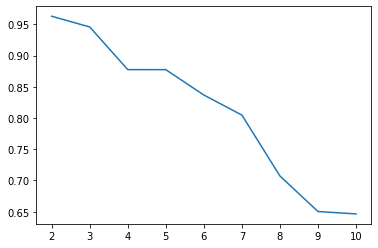

In [22]:
plt.plot(allclusters,allscore)

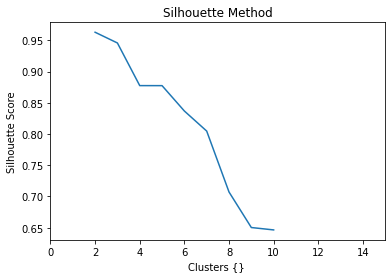

In [23]:
plt.plot(allclusters, allscore)
plt.xlabel('Clusters {} ')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

In [24]:
model = KMeans(n_clusters = 4)

In [25]:
model = model.fit(x)

In [26]:
pred = model.predict(x)

In [27]:
pred
x['cluster'] = pred

In [28]:
x.head()

,Orders.subtotal_x,Orders.subtotal_y,cluster
Customers.id,,,
3,88.78,2.0,0
4,19.56,1.0,0
5,95.14,3.0,0
7,39.19,1.0,0
8,59.75,1.0,0


In [29]:
silhouette_score(x, pred)

0.8775291785032662

No handles with labels found to put in legend.


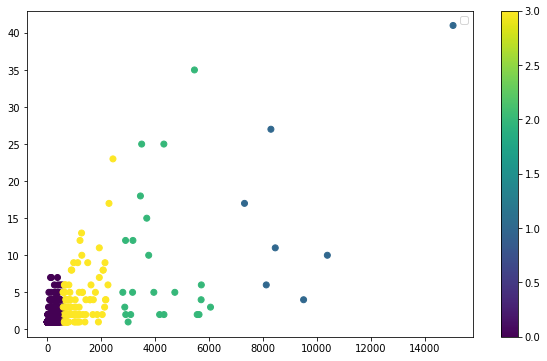

In [30]:
plt.figure(figsize = (10,6))
plt.scatter(x['Orders.subtotal_x'], x['Orders.subtotal_y'], c=pred)
plt.legend()
plt.colorbar()
plt.show()